In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# Evaluating Statistical Models


So far we have introduced a few statistical (machine learning) models and some performance metrics. From working on the preactical projects, you must have discovered that there are so many aspects of a statistical model that it's hard to compare between different models, as well as the choice of hyper-parameters among a family of model.

In this module, we are going to discuss a few aspects of how to evaluate statistical models. We will start from some commonly used performance metrics, estimating the performance on future data, and some meta framework for model evaluation.

# Outline
---

- What do Statistical Models Do
- Performance metrics
- Errors, in and out of sample 
- Bias-Variance Tradeoff
- Overfitting and model selection
- Cross-validation



# What do Statistical Models Do?

There are (at least) three levels at which we can use statistical models in data analysis: 

- as *summaries of the data*, 
- as *predictors*, and 
- as *simulators*. 

# Data Summarization

Like most descriptive statistics, a statistical model can summarize the data with a set of *parameters*. This can be the lowest and least demanding level usage of a statistical model, which is for **data reduction**, or **compression**. Instead of remembering all the data points on a scatter-plot, say, we’d just remember what the mean and variance of them.

The summary can be in the form of a theoretical distribution (*parametric*) or empirical functions(*non-parametric*).

In [3]:
# Generate dataset
data = np.random.normal(100, 15, 500)
# Calculate statistics
mu = data.mean()
sigma = data.std()
# Calculate PDF from data
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
h = np.histogram(data, bins=x)
# Plot
#print(mu)
#print(sigma)

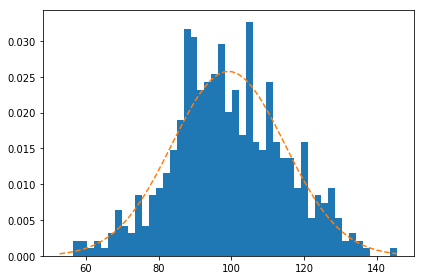

In [4]:
fig, ax = plt.subplots()
n, hx, patches = ax.hist(data, bins=x, density=1)
# Calculate PDF from Gaussian distribution
import scipy.stats as stats
y = stats.norm.pdf(hx, mu, sigma)
ax.plot(hx, y, '--')
plt.tight_layout()
plt.show()

# Prediction

The most well-known usage of machine learning models is **using statistical models for prediction**. Once we formed the knowledge of the joint distribution of our data, we can predict variables described by the model.

Most **evaluation** techniques are designed based on the performance of predictions. 



# Simulation

Once the parameters of the statistical models are learned from the data, we can use the model to *generate / simulate* new data. If we train our model with the *Bayesian* approach, then *simulation* is inluded in the learning process. Due to the success of deep convolutional neural network, the generative statistical models are now widely applied to generate digital contents, such as [GPT-2](https://openai.com/blog/better-language-models/), [MuseNet](https://openai.com/blog/musenet/), and [Deepfake](https://en.wikipedia.org/wiki/Deepfake).

<img src="https://cdn.vox-cdn.com/thumbor/nKhCSXmFymvUPS8Rf1NuMcSFAZQ=/800x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/16226452/dali.gif" height="200"/>

# Common Performance Metrics for Classification

- Confusion matrix
  - Accuracy
  - Precision
  - Recall
  - Specificity
  - F1 score
- Precision-Recall or PR curve
- ROC (Receiver Operating Characteristics) curve
- PR vs ROC curve.


# Confusion Matrix

In statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

<img src='figures/confusion_matrix.png' />

Many metrics can be derived from this confusion metrics, and [the wikipedia entry](https://en.wikipedia.org/wiki/Confusion_matrix) has a complete list of them.

# Accuracy, Precision, Recall, and F-1

- **Accuracy**: the probability of being correct.
- **Precision**: the probability of being correct when predicting true.
- **Recall**: the probability of being correct when actually true.
- **F-1 socre**: the harmonic mean of **precision** and **recall**, a balanced measure.

# ROC  (Receiver Operating Characteristics) Curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning.

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png' />

# Metrics for Regression problems

- RMSE (Root Mean Squared Error)
- $R^2$

# Deriving Performance Metrics in Practice

The package [`scikit-learn`](https://scikit-learn.org/stable/modules/model_evaluation.html) provides a thourough list of performance metrics, so that it's rather easy to use in practice. Let's see some examples.

# [Understanding the Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)



# Errors, in and out of sample